<a href="https://colab.research.google.com/github/victoriahebling/laranjas/blob/main/Etapa0_Regress%C3%A3o/Regress%C3%A3o_laranjas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from google.colab import files
from sklearn.neural_network import MLPRegressor 
from sklearn.model_selection import train_test_split 
'''vai separar o treino e o teste utilizando o train_test_split'''
from sklearn import preprocessing
'''dentro do preprocessing vamos usar uma função chamada MaxMinScaler, para fazer a 
normatização dos dados e a volta da normatização'''
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
''' biblioteca para plotar gráficos'''

' biblioteca para plotar gráficos'

In [ ]:
#Abrindo o arquivo do excel 
link = 'https://raw.githubusercontent.com/victoriahebling/ANN/main/laranjas1.csv'
df = pd.read_csv(link, delimiter=';')

In [ ]:
#testando se abriu corretamente
df.head(3)  #mostrar 3 primeiras linhas do arquivo do excel

,Tipo,Laranja,Massa,Volumesuco,Ph,Temperaturasuco,Brix,comprimento,largura,Furo,Temperaturaambiente
0,1,1,112,46.0,3.90,22.6,11.4,5.74,5.96,3,23
1,1,2,173,84.0,3.88,22.1,10.2,6.67,6.88,5,23
2,1,3,106,50.0,4.16,22.4,10.1,6.04,5.71,2,23


In [ ]:
Index = [3, 7, 8, 9]
dfselect=[]
dfselect=df.iloc[1:,Index].copy()

In [ ]:
dfselect.head(3)

,Volumesuco,comprimento,largura,Furo
1,84.0,6.67,6.88,5
2,50.0,6.04,5.71,2
3,90.0,6.71,6.67,4


In [ ]:
# separa os dados em normatizados e originais
# X = dfselect[['comprimento','largura', 'Furo']]
# X = dfselect[['comprimento','largura']]
# X = dfselect[['Furo']]
X = dfselect[['comprimento','Furo']]
y = np.array(dfselect[['Volumesuco']]).reshape(-1,1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20, shuffle=True, random_state=42)

In [ ]:
scaler_X = preprocessing.MinMaxScaler((-1,1)).fit(X) 
#como se estivesse gerando aquela função que escalona para X e para Y
scaler_Y = preprocessing.MinMaxScaler((-1,1)).fit(y)

In [ ]:
X_train = scaler_X.transform(X_train)
X_test = scaler_X.transform(X_test)
y_train = scaler_Y.transform(y_train)
y_test = scaler_Y.transform(y_test)

In [ ]:
#analisando qual a quantidade de neuronios melhor se adequa para a rede neural
'''HN1 =[] #camada oculta1
HN2 = [] #camalda oculta2
train_R2 =[] #r2 para treino
test_R2 = [] #r2 para teste
for i in range(3,12):
  for j in range(3,12):
    ####
    # define a rede neural 
    model = MLPRegressor(solver='lbfgs',activation='tanh',alpha=1e-5,hidden_layer_sizes=(i,j),
                         random_state=1,max_iter=500)
    
    # treina a rede neural
    model.fit(X_train, y_train)

    # usa a rede neural treina em calculos para treino e teste
    y_calc_train=model.predict(X_train)
    y_calc_test=model.predict(X_test)
    
    # transforma dos dados calculados na forma original (nao normatizado)
    y_obs_train=scaler_Y.inverse_transform(np.array(y_train).reshape(-1,1))
    y_obs_test=scaler_Y.inverse_transform(np.array(y_test).reshape(-1,1))
    y_calc_train=scaler_Y.inverse_transform(y_calc_train.reshape(-1,1))
    y_calc_test=scaler_Y.inverse_transform(y_calc_test.reshape(-1,1))
    mse=mean_squared_error(y_obs_test,y_calc_test)
    R2_teste=r2_score(y_obs_test,y_calc_test)
    R2_treino=r2_score(y_obs_train,y_calc_train)
    #print("i,j=",i,j,"R^2 treino=",R2_treino,"R^2 teste=",R2_teste)
    HN1.append(i)
    HN2.append(j)
    train_R2.append(R2_treino)
    test_R2.append(R2_teste)'''

'HN1 =[] #camada oculta1\nHN2 = [] #camalda oculta2\ntrain_R2 =[] #r2 para treino\ntest_R2 = [] #r2 para teste\nfor i in range(3,12):\n  for j in range(3,12):\n    ####\n    # define a rede neural \n    model = MLPRegressor(solver=\'lbfgs\',activation=\'tanh\',alpha=1e-5,hidden_layer_sizes=(i,j),\n                         random_state=1,max_iter=500)\n    \n    # treina a rede neural\n    model.fit(X_train, y_train)\n\n    # usa a rede neural treina em calculos para treino e teste\n    y_calc_train=model.predict(X_train)\n    y_calc_test=model.predict(X_test)\n    \n    # transforma dos dados calculados na forma original (nao normatizado)\n    y_obs_train=scaler_Y.inverse_transform(np.array(y_train).reshape(-1,1))\n    y_obs_test=scaler_Y.inverse_transform(np.array(y_test).reshape(-1,1))\n    y_calc_train=scaler_Y.inverse_transform(y_calc_train.reshape(-1,1))\n    y_calc_test=scaler_Y.inverse_transform(y_calc_test.reshape(-1,1))\n    mse=mean_squared_error(y_obs_test,y_calc_test)\n    

In [ ]:
#analisando qual a quantidade de neuronios melhor se adequa para a rede neural
'''df = pd.DataFrame({'camada 1':HN1,'camada 2':HN2,'R2 treino':train_R2,'R2 teste':test_R2})
#print(df) #assim n vai mostrar todas as linhas

pd.set_option('display.max_rows', None)
print(df)'''

"df = pd.DataFrame({'camada 1':HN1,'camada 2':HN2,'R2 treino':train_R2,'R2 teste':test_R2})\n#print(df) #assim n vai mostrar todas as linhas\n\npd.set_option('display.max_rows', None)\nprint(df)"

In [ ]:
#escolheremos portanto a interação 9, ou seja: 4 neuronios na primeira camada oculta e 3 na segunda camada oculta.

In [ ]:
# define a rede neural
model = MLPRegressor(solver ='lbfgs', activation ='tanh', alpha=1e-5, hidden_layer_sizes=(4,3), random_state=1)

# treina a rede neural
model.fit(X_train, y_train)

# usa a rede neural traina em cálculos para treino e teste
y_calc_train = model.predict(X_train)
y_calc_test = model.predict(X_test)

# transforma dos dados calculados na forma original (nao normatizado)
y_obs_train=scaler_Y.inverse_transform(np.array(y_train).reshape(-1,1))
y_obs_test=scaler_Y.inverse_transform(np.array(y_test).reshape(-1,1))
y_calc_train=scaler_Y.inverse_transform(y_calc_train.reshape(-1,1))
y_calc_test=scaler_Y.inverse_transform(y_calc_test.reshape(-1,1))

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


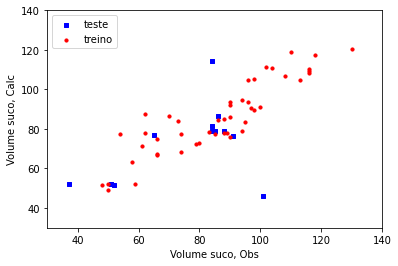

In [ ]:
# expressando os dados em gráfico
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(y_obs_test,y_calc_test, s=10, c='b', marker="s", label='teste')
ax1.scatter(y_obs_train,y_calc_train, s=10, c='r', marker="o", label='treino')
plt.legend(loc='upper left')
plt.xlim([30,140])
plt.ylim([30,140])
plt.ylabel('Volume suco, Calc')
plt.xlabel('Volume suco, Obs')
plt.show()

In [ ]:
mse=mean_squared_error(y_obs_train,y_calc_train)
print("MSE treino=",mse)
R2=r2_score(y_obs_train,y_calc_train)
print("R^2 treino=",R2)

MSE treino= 85.46327309292636
R^2 treino= 0.7937772400265171


In [ ]:
mse=mean_squared_error(y_obs_test,y_calc_test)
print("MSE teste=",mse)
R2=r2_score(y_obs_test,y_calc_test)
print("R^2 teste=",R2)

MSE teste= 387.55730581023545
R^2 teste= -0.10502637487474087
